**Introdução**

Este projeto é uma extensão e atualização de uma análise premiada, criada por Alan Felipe para o State of Data Brazil Challenge 2022. Lançado publicamente na plataforma Kaggle, o projeto original faz uma analise do mercado de trabalho de dados brasileiro com um foco especial na satisfação dos profissionais do setor.

Três anos depois, com o mercado em constante evolução, o objetivo desta análise é revisitar o tema e descobrir como profissionais, empresas e gestores da área se adaptaram.

Será que as conclusões originais ainda se aplicam em 2025? A satisfação dos profissionais, os desafios dos gestores e a dinâmica do mercado de dados ainda são os mesmos? Isso é o que vamos descobrir! 💪


Esta análise, assim como a original, está organizada em três partes principais. <P>
* 1º motivações e a satisfação dos profissionais de dados.
* 2º fatores que influenciam o contentamento no trabalho.
* 3º ferramenta baseada em Machine Learning

Todos os detalhes sobre o desenvolvimento e a evolução deste projeto estão disponíveis no [meu GitHub](https://github.com/AnaPaulistaGit/state-of-data-2022).

Para quem quiser conferir o projeto original que inspirou esta análise, o trabalho de Alan Felipe pode ser acessado [aqui](https://github.com/alanxfelipex/state-of-data-2022/).




In [4]:
# ===============================
# Importando bibliotecas
# ===============================
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

# ===============================
# Configurações de cores
# ===============================
CORES = {
    "amarelo": "#FFD744",
    "vermelho": "#A80000",
    "azul": "#183154",
    "branco": "#FFFFFF"
}

# ===============================
# Carregando e limpando dados para a base 2025
# ===============================

# Caminho do arquivo CSV
CAMINHO_CSV = "/content/drive/MyDrive/Colab Projetos/State_of_data/State_of_data_2024.csv"

# Lendo o CSV e removendo duplicados
df_2025 = pd.read_csv(CAMINHO_CSV, low_memory=False).drop_duplicates()

# ===============================
# Renomeando colunas para base 2025
# ===============================
colunas_renomear = {
    # Identidade
    "0.a_token": "id",
    "1.a_idade": "idade",
    "1.b_genero": "genero",
    "1.c_cor/raca/etnia": "cor",
    "1.d_pcd": "pcd",
    "1.e_experiencia_profissional_prejudicada": "experiencia_prejudicada",
    "1.i.2_regiao_onde_mora": "regiao",
    "1.l_nivel_de_ensino": "ensino",
    "1.m_área_de_formação": "area_de_formacao",

    # Situação profissional
    "2.a_situação_de_trabalho": "situacao_atual",
    "2.b_setor": "setor",
    "2.c_numero_de_funcionarios": "numero_de_funcionarios",
    "2.d_atua_como_gestor": "gestor",
    "2.f_cargo_atual": "cargo_atual",
    "2.g_nivel": "nivel",
    "2.h_faixa_salarial": "faixa_salario",
    "2.i_tempo_de_experiencia_em_dados": "experiencia_com_dados",
    "2.j_tempo_de_experiencia_em_ti": "experiencia_com_TI_engenharia",
    "2.k_satisfeito_atualmente": "satisfeito",

    # Modelos de trabalho
    "2.r_modelo_de_trabalho_atual": "modelo_de_trabalho",
    "2.s_modelo_de_trabalho_ideal": "modelo_de_trabalho_ideal",
    "2.t_atitude_em_caso_de_retorno_presencial": "volta_ao_presencial",

    # Mudança de emprego
    "2.n_planos_de_mudar_de_emprego_6m": "mudar_de_emprego",

    # Motivos de insatisfação
    "2.o.7_Plano de carreira e oportunidades de crescimento": "oportunidade",
    "2.o.1_Remuneração/Salário": "salario_mercado",
    "('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')": "lider",
    "2.o.9_Qualidade dos gestores e líderes": "lider",
    "('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')": "area",
    "5.a_objetivo_na_area_de_dados": "area",
    "('P2_l_5 ', 'Gostaria de receber mais benefícios')": "beneficios",
    "2.l.2_Benefícios": "beneficios",
    "('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')": "clima",
    "2.o.5_Ambiente e clima de trabalho": "clima",
    "('P2_l_7 ', 'Falta de maturidade analítica na empresa')": "maturidade",
    "2.o.8_Maturidade da empresa em termos de tecnologia e dados": "maturidade",
    "3.c.1_Pensar na visão de longo prazo de dados": "visao",

    # Tamanho da equipe
    "3.a_numero_de_pessoas_em_dados": "tamanho_equipe",

    # Funções e desafios dos gestores
    "3.c.2_Organização de treinamentos e iniciativas": "treinamento",
    "3.c.3_Atração, seleção e contratação": "rh",
    "3.c.4_Decisão sobre contratação de ferramentas": "ferramentas",
    "6.a.6_Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.": "data_lake",
    "2.l.9_Relação com os gestores e líderes": "gestor_equipe",
    "3.c.7_gestor da equipe de Inteligência Artificial e Machine Learning": "gestor_ia",
    "3.c.8_Apesar de ser gestor ainda atuo na parte técnica": "parte_tecnica",
    "3.d.5_Gestão de projetos envolvendo áreas multidisciplinares": "gestor_etapa",
    "3.c.10_Gestão de produtos de dados": "gestor_produto",
    "3.c.11_Gestão de pessoas": "desenvolvimento",
    "3.d_desafios_como_gestor": "desafios_gestor"
}

df_2025.rename(columns=colunas_renomear, inplace=True)
df_2025 = df_2025.loc[:,list(colunas_renomear.values())]
#df_2025.to_csv('State_of_data_2025_v1.csv', sep=';', index=False)


In [5]:
# ===========================================
# Carregando e limpando dados para a base 2022
# ===========================================

# Caminho do arquivo CSV
CAMINHO_CSV = "/content/drive/MyDrive/Colab Projetos/State_of_data/State_of_data_2022.csv"

# Lendo o CSV e removendo duplicados
df_2022 = pd.read_csv(CAMINHO_CSV, low_memory=False).drop_duplicates()

# ===============================
# Renomeando colunas para base 2022
# ===============================
colunas_renomear = {
    "('P0', 'id')" : "id",
    "('P1_a_1 ', 'Faixa idade')" : "idade",
    "('P1_b ', 'Genero')" : "genero",
    "('P1_c ', 'Cor/raca/etnia')" : "cor",
    "('P1_d ', 'PCD')" : 'pcd',
    "('P1_e ', 'experiencia_profissional_prejudicada')" : "experiencia_prejudicada",
    "('P1_i_2 ', 'Regiao onde mora')" : 'regiao',
    "('P1_l ', 'Nivel de Ensino')" : "ensino",
    "('P1_m ', 'Área de Formação')" : "area_de_formacao",
    "('P2_a ', 'Qual sua situação atual de trabalho?')" : "situacao_atual",
    "('P2_b ', 'Setor')" : "setor",
    "('P2_c ', 'Numero de Funcionarios')" : 'numero_de_funcionarios',
    "('P2_d ', 'Gestor?')" : "gestor",
    "('P2_f ', 'Cargo Atual')": "cargo_atual",
    "('P2_g ', 'Nivel')" : "nivel",
    "('P2_h ', 'Faixa salarial')": "faixa_salario",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": "experiencia_com_dados",
    "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')" : "experiencia_com_TI_engenharia",
    "('P2_k ', 'Você está satisfeito na sua empresa atual?')" : "satisfeito",

    # Colunas sobre modelo de trabalho remoto de colaboradores de 2022
    "('P2_p ', 'Atualmente qual a sua forma de trabalho?')" : 'modelo_de_trabalho',
    "('P2_q ', 'Qual a forma de trabalho ideal para você?')" : "modelo_de_trabalho_ideal",
    "('P2_r ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')" : "volta_ao_presencial",


    # Coluna sobre querer mudar de emprego
    "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')" : "mudar_de_emprego",

    # Colunas sobre os motivos de insatisfação de colaboradores de 2022
    "('P2_l_1 ', 'Falta de oportunidade de crescimento no emprego atual')" : "oportunidade",
    "('P2_l_2 ', 'Salário atual não corresponde ao mercado')" : "salario_mercado",
    "('P2_l_3 ', 'Não tenho uma boa relação com meu líder/gestor')" : "lider",
    "('P2_l_4 ', 'Gostaria de trabalhar em em outra área de atuação')" : "area",
    "('P2_l_5 ', 'Gostaria de receber mais benefícios')" : "beneficios",
    "('P2_l_6 ', 'O clima de trabalho/ambiente não é bom')": "clima",
    "('P2_l_7 ', 'Falta de maturidade analítica na empresa')" : 'maturidade',
    "('P3_c_1 ', 'Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.')" : "visao",

    # tamnho da equipe
    "('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')" : "tamanho_equipe",

    # Colunas sobre desafios e funções dos gestores de 2022
    "('P3_c_2 ', 'Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.')" : "treinamento",
    "('P3_c_3 ', 'Atração, seleção e contratação de talentos para o time de dados.')" : "rh",
    "('P3_c_4 ', 'Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.')" : "ferramentas",
    "('P3_c_5 ', 'Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados, garantindo a qualidade e confiabilidade da informação.')" : "data_lake",
    "('P3_c_6 ', 'Sou gestor da equipe responsável pela entrega de dados, estudos, relatórios e dashboards para as áreas de negócio da empresa.')" : "gestor_equipe",
    "('P3_c_7 ', 'Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.')" : "gestor_ia",
    "('P3_c_8 ', 'Apesar de ser gestor ainda atuo na parte técnica, construindo soluções/análises/modelos etc.')": "parte_tecnica",
    "('P3_c_9 ', 'Gestão de projetos de dados, cuidando das etapas, equipes envolvidas, atingimento dos objetivos etc.')": "gestor_etapa",
    "('P3_c_10 ', 'Gestão de produtos de dados, cuidando da visão dos produtos, backlog, feedback de usuários etc.')": "gestor_produto",
    "('P3_c_11 ', 'Gestão de pessoas, apoio no desenvolvimento das pessoas, evolução de carreira')": "desenvolvimento",
    "('P3_d ', 'Quais são os 3 maiores desafios que você tem como gestor no atual momento?')" : "desafios_gestor"
}

df_2022.rename(columns=colunas_renomear, inplace=True)
df_2022 = df_2022.loc[:,list(colunas_renomear.values())]
#df_2022.to_csv('State_of_data_2022_v1.csv', sep=';', index=False)


In [6]:
# ==============================================
# FUNCOES DOS GESTORES EM 2022 vs. 2025
# ==============================================

def gerar_grafico_funcoes(df, ano):
    # Configuração dinâmica das funções e colunas correspondentes
    funcoes = {
        'Pensar na visão de longo prazo de dados da empresa ': 'visao',
        'Apoio no Desenvolvimento das Pessoas ': 'desenvolvimento',
        '<b>Atração, Seleção e Contratação de Talentos</b> ': 'rh',
        'Gestor da equipe responsável pela entrega de dados e relatórios ': 'gestor_equipe',
        'Gestão de projetos de Dados ': 'gestor_etapa',
        'Organização de Treinamentos ': 'treinamento',
        'Decisão sobre contratação de Ferramentas ': 'ferramentas',
        'Ainda atuo na parte Técnica ': 'parte_tecnica',
        'Gestão de produtos de dados ': 'gestor_produto',
        'Gestor da equipe de projetos envolvendo IA ': 'gestor_ia',
        'Gestor da equipe responsável pela engenharia de dados ': 'data_lake'
    }

    # Calcula os valores automaticamente a partir do DataFrame
    valores = {funcao: df[col].sum() for funcao, col in funcoes.items()}

    # Ordena por valores
    categorias_ordenadas, valores_ordenados = zip(*sorted(valores.items(), key=lambda x: x[1]))

    # Cores e hachuras dinâmicas
    colors = [CORES['vermelho'] if '<b>' in cat else CORES['branco'] for cat in categorias_ordenadas]
    hachuras = ['' if '<b>' in cat else '/' for cat in categorias_ordenadas]

    # Criação do gráfico
    fig = go.Figure([go.Bar(
        y=categorias_ordenadas,
        x=valores_ordenados,
        marker_pattern_shape=hachuras,
        marker_color=colors,
        marker_line=dict(width=1.8, color='black'),
        orientation='h'
    )])

    # Layout dinâmico
    fig.update_layout(
        title={
            'text': f"<b>Principais Funções dos Gestores ({ano})</b>",
            'font': dict(size=26, color='black', family='Times New Roman'),
            'y': 0.95,
            'x': 0.5
        },
        height=400, width=830,
        font_family='Times New Roman',
        font_color='black',
        font_size=16,
        plot_bgcolor='white'
    )

    fig.show()


gerar_grafico_funcoes(df_2022, 2022)
gerar_grafico_funcoes(df_2025, 2025)


**FUNÇOES** 🔨  <br>

<b>Como era em 2022:</b><br>
Entre as principais tarefas relatadas, a Atração, Seleção e Contratação de Talentos se destacou como a terceira mais comum nesse grupo. <br>
<b>Como esta sendo em 2025:</b><br>
Pensar na visão de longo prazo de dados da empresa e Apoio no Desenvolvimento das Pessoas continuam como as duas funções mais citadas.
Atração, Seleção e Contratação de Talentos manteve-se como a terceira função mais importante, mas ganhou mais relevância em volume absoluto em 2025. <br>
<b>Diagnóstico</b><br>
<b>A liderança estratégica está mais forte:</b>
A visão de longo prazo e o desenvolvimento de pessoas continuam liderando, mas com maior volume absoluto, o que indica que o papel do gestor de dados está cada vez mais voltado para a construção de cultura e estratégia.

<b>Persistência da sobrecarga técnica:</b>
A subida de “Ainda atuo na parte técnica” mostra que muitos gestores ainda precisam colocar a “mão na massa” em 2025, possivelmente por falta de equipe suficiente ou maturidade do time.

<b>Maior foco em pessoas e talentos:</b>
A relevância de “Apoio no Desenvolvimento” e “Atração e Contratação” indica que a guerra por talentos de dados segue intensa e a retenção/treinamento é crítica.

<b>Integração crescente de IA:</b>
A melhora de posição de funções envolvendo IA mostra que essa tecnologia está se tornando parte natural da gestão de dados, não mais apenas um projeto experimental.

In [7]:
# ======================================
# DESAFIOS DOS GESTORES EM 2022 vs. 2025
# =====================================


def gerar_grafico_desafios(df, ano):
    # 1) pegar a série, garantir string e remover NaN
    s = df['desafios_gestor'].dropna().astype(str)

    # 2) dividir em até 3 partes (n=2 -> até 3 peças) e empilhar
    partes = s.str.split('.', n=2, expand=True)       # colunas 0,1,2 (se existirem)
    stacked = (partes
            .stack()                                # transforma todas as colunas em uma única Series
            .astype(str)
            .str.strip()                             # tira espaços
            .str.lstrip(', ')                        # remove traços iniciais se houver
            .str.rstrip('.')                         # remove o ponto da terceira coluna
            .replace('', np.nan)                     # transforma strings vazias em NaN
            .dropna())

    # 3) contar ocorrências de cada motivo (já ordenado por frequência desc)
    desafio_final = (stacked
                 .value_counts()
                 .rename_axis('desafio')            # nome da série index
                 .reset_index(name='contagem'))     # cria dataframe com colunas ['desafio','contagem']


    # 4) selecionar top 10 (os 10 mais frequentes).
    #    invertendo a ordem para plot horizontal (do menor para o maior)
    top_n = 10
    top_10 = desafio_final.head(top_n).iloc[::-1].reset_index(drop=True)

    # 5) cores/hachuras dinâmicas (ex.: destaque por posição ou por regra)
    n = len(top_10)
    colors = [CORES['branco']] * n
    patterns = ['/'] * n

    # destaque: maior (último na lista invertida) em vermelho, 5º maior em azul (se existir)
    if n >= 1:
        colors[-1] = CORES['vermelho']; patterns[-1] = ''
    if n >= 5:
        colors[-5] = CORES['azul']; patterns[-5] = ''

    # 6) gráfico horizontal com os valores mostrados nas barras
    fig = go.Figure(
        go.Bar(
            x=top_10['contagem'],
            y=top_10['desafio'],
            orientation='h',
            marker_color=colors,
            marker_pattern_shape=patterns,
            marker_line=dict(width=1.8, color='black'),
            text=top_10['contagem'],
            textposition='auto',
            hovertemplate='%{y}<br>Contagem: %{x}<extra></extra>'
        )
    )

    fig.update_layout(
    title={
        'text': f"<b>Os 10 Principais desafios dos Gestores em {ano}</b>",
        'font': dict(size=24, color='black', family='Times New Roman'),
        'y': 0.9, 'x': 0.1
    },
    height=420, width=900,
    font_family='Times New Roman',
    font_color='black',
    font_size=14,
    plot_bgcolor='white'
    )

    fig.show()

gerar_grafico_desafios(df_2022, 2022)
gerar_grafico_desafios(df_2025, 2025)


<b>Principais Desafios   🧿</b>

<b>Como era em 2022:</b><br>
Os desafios em 2022 estavam mais ligados à gestão de pessoas e organização de informações <br>
<b>Como esta sendo em 2025:</b><br>
Em 2025, os desafios se concentram em entregar resultados de negocio, ROI e inovacao a partir dos dados<br>
<b>Diagnostico</b><br>
Com a maturidade do mercado de dados as empresas ja superaram a fase de apenas reter talentos e agora cobram valor estrategico e financeiros dos projetos alem de intensifiar a pressao por retorno sobre investimentos (ROI)

In [8]:
# ===============================================
# SATISFAÇAO COM O ATUAL MODELO DE TRABALHO 2022 vs 2025
# ================================================

# --- Função para formatar ---
def formatar_df(df, coluna):
    df = df.dropna(subset=[coluna, 'satisfeito'])

    # Contagem de satisfeitos/insatisfeitos
    contagem = df.groupby([coluna, 'satisfeito'], observed=False)['id'].count().unstack(fill_value=0)
    contagem.columns = ['insatisfeitos', 'satisfeitos']  # garante ordem
    contagem = contagem.reset_index()

    # Totais e percentuais
    contagem['total'] = contagem['satisfeitos'] + contagem['insatisfeitos']
    contagem['por_centagem_satisfeitos'] = (contagem['satisfeitos'] * 100) / contagem['total']
    contagem['por_centagem_insatisfeitos'] = (contagem['insatisfeitos'] * 100) / contagem['total']

    return contagem


# --- Função genérica para criar gráfico ---
def grafico_satisfacao(df, coluna, ano):
    # Mapeamento para simplificação de nomes (usado só se for "modelo_de_trabalho")
    mapa_modelos = {
        'Modelo 100% presencial': '100% Presencial',
        'Modelo híbrido com dias fixos de trabalho presencial': 'Híbrido com dias Fixos',
        'Modelo 100% remoto': '100% Remoto',
        'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Híbrido Flexível'
    }

    # Se a coluna for "modelo_de_trabalho", aplicar mapeamento
    if coluna == "modelo_de_trabalho":
        df[coluna] = df[coluna].map(mapa_modelos)
        ordem = list(mapa_modelos.values())
        df[coluna] = pd.Categorical(df[coluna], categories=ordem, ordered=True)

    # Formatar dataframe
    df_formatado = formatar_df(df, coluna)

    # Aplicar ordenação, se existir
    if coluna == "modelo_de_trabalho":
        df_formatado[coluna] = pd.Categorical(df_formatado[coluna], categories=ordem, ordered=True)
        df_formatado = df_formatado.sort_values(coluna)

    # Criar gráfico
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=["<br><b>Valor Total", "<br><b>Proporcional"],
        shared_yaxes=False
    )

    # Configuração das barras absolutas
    config_barras = [
            ('satisfeitos', 'Pessoas Satisfeitas', CORES['branco'], '/'),
            ('insatisfeitos', 'Pessoas Insatisfeitas', CORES['vermelho'], None)
    ]


    # Adiciona col.1 (valores absolutos)
    for col, nome, cor, padrao in config_barras:
        fig.add_trace(go.Bar(
            x=df_formatado[coluna],
            y=df_formatado[col],
            name=nome,
            marker_color=cor,
            marker_pattern_shape=padrao,
            marker_line=dict(width=1.8, color='black')
        ), row=1, col=1)

    # Adiciona col.2 (percentuais)
    config_percentuais = [
        ('por_centagem_satisfeitos', 'Pessoas Satisfeitas', CORES['branco'], '/'),
        ('por_centagem_insatisfeitos', 'Pessoas Insatisfeitas', CORES['vermelho'], None)
    ]

    for col, nome, cor, padrao in config_percentuais:
        fig.add_trace(go.Bar(
            x=df_formatado[coluna],
            y=df_formatado[col],
            name=nome,
            marker_color=cor,
            marker_pattern_shape=padrao,
            marker_line=dict(width=1.8, color='black'),
            showlegend=False
        ), row=1, col=2)

    # Layout
    fig.update_layout(
        title={
            'text': f"<b>Satisfação com o atual {coluna.replace('_', ' ')} ({ano})</b>",
            'font': dict(size=26, color='black', family='Times New Roman'),
            'y': 0.95,
            'x': 0.5
        },
        height=400, width=650,
        font=dict(family='Times New Roman', color='black', size=16),
        plot_bgcolor='white',
        showlegend=True
    )

    return fig

df_filtrado = df_2022[['id', 'modelo_de_trabalho', 'satisfeito']].dropna()
fig_2022 = grafico_satisfacao(df_filtrado, "modelo_de_trabalho", 2022)

df_filtrado = df_2025[['id', 'modelo_de_trabalho', 'satisfeito']].dropna()
fig_2025 = grafico_satisfacao(df_filtrado, "modelo_de_trabalho", 2025)

fig_2022.show()
fig_2025.show()




<b>Condições que trazem satisfação para os profissionais de Dados</b>

<b>Como era em 2022:</b><br>
A preferência pelo trabalho 100% remoto tem maior numero de satisfeitos, seguido pelos modelo hibridos. A insatisfaçao aparece em todos os modelos mas o 100% presencial é o modelo com menor adesao em satisfaçao.<br>
<b>Como esta sendo em 2025:</b><br>
O modelo 100% remoto ainda tem uma tendencia clara com bom volume absoluto e satisfaçao proporcional alta.<br>
<b>Diagnóstico</b><br>
Preferência clara por autonomia: O modelo remoto lidera em volume de satisfeitos, sinal de que flexibilidade de local/horário e deslocamento ao trabalho pesam muito.<br>
Flexível: quando há liberdade de escolha (flexível), a satisfação se aproxima do remoto, a obrigatoriedade de dias reduz o engajamento.<br>
Presencial é o ponto crítico com menor adesão e satisfação proporcional baixa


In [9]:
# =====================================
# VOLTA AO AMBIENTE DE TRABALHO PRESENCIAL
#=====================================

# --- Função auxiliar para ordenar ---
def ordenar(df, coluna, ordem):
    df = df.copy()
    df[coluna] = pd.Categorical(df[coluna], categories=ordem, ordered=True)
    return df.sort_values(coluna)

# --- Função principal para criar o gráfico ---
def grafico_volta_presencial(df, ano, cores, titulo_extra=""):
    """
    Gera gráfico de resposta dos profissionais remotos caso voltem ao presencial.

    df: DataFrame do ano desejado
    ano: int (2022, 2025, ...)
    cores: dict de cores já definido
    titulo_extra: texto adicional opcional no título
    """
    # --- Pré-processamento ---
    presencial_remoto = (
        df.loc[:, ["id", "modelo_de_trabalho", "volta_ao_presencial", "satisfeito"]]
        .dropna()
        .assign(satisfeito=lambda x: x["satisfeito"].map({True: 1, False: 0}).astype(int))
    )

    # Filtra não-presenciais
    remoto = presencial_remoto.query('modelo_de_trabalho != "Modelo 100% presencial"').copy()

    # Ordem personalizada
    ordem = [
        "Vou procurar outra oportunidade no modelo 100% remoto",
        "Vou procurar outra oportunidade no modelo híbrido ou remoto",
        "Vou aceitar e retornar ao modelo 100% presencial"
    ]

    # Aplica ordenação
    remoto = ordenar(remoto, "volta_ao_presencial", ordem)
    remoto_formatado = ordenar(formatar_df(remoto, 'volta_ao_presencial'), "volta_ao_presencial", ordem)

    # Valores para o eixo Y
    valores_y = [
        "Procurar oportunidade 100% remota",
        "Procurar oportunidade remota ou hibrida",
        "<b>Aceitar e voltar ao presencial"
    ]

    # --- Gráfico ---
    fig = go.Figure(go.Bar(
        x=remoto_formatado["total"],
        y=valores_y,
        orientation="h",
        marker=dict(
            color=[cores['branco'], cores['branco'], cores['vermelho']],
            line=dict(width=1.8, color="black"),
            pattern_shape=['/', '/', '']
        )
    ))

    fig.update_layout(
        title=dict(
            text=f"<b>Profissionais que trabalham remoto respondem o que <br>"
                 f"fariam se tivessem que voltar presencialmente ({ano}) </b><br>{titulo_extra}",
            font=dict(size=22, color="black", family="Times New Roman"),
            y=0.95, x=0.5
        ),
        height=300, width=600,
        font=dict(family="Times New Roman", color="black", size=16),
        plot_bgcolor="white",
        showlegend=False
    )

    return fig


# ---Chamando função ---
fig_2022 = grafico_volta_presencial(df_2022, 2022, CORES)
fig_2025 = grafico_volta_presencial(df_2025, 2025, CORES)

fig_2022.show()
fig_2025.show()


<b>E se voltasse para o presencial? </b><br>
<b>Como era em 2022:</b><br>
A preferência pelo trabalho não presencial é tão significativa em 2022 que apenas uma pequena parcela dos profissionais que trabalham no modelo remoto ou flexível estaria disposta a retornar às atividades fixas no escritório. <br>
<b>Como esta sendo 2025:</b><br>
A adesão ao trabalho não presencial ainda é marcante. Se as empresas optassem pelo retorno ao escritório, a maior parte desses trabalhadores priorizaria vagas híbridas ou totalmente remotas, enquanto uma parcela significativa buscaria exclusivamente oportunidades de trabalho remoto. <br>
<b>Diagnostico</b><br>
O modelo remoto e hibrido flexivel mostra-se o mais sustentavel ao longo do tempo.


In [10]:
# ===========
# SALARIO
#============

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_salario(df, ano):
    """
    Cria gráfico de satisfação por faixa de salário (absoluto e proporcional)
    para um determinado ano.

    Parâmetros:
        df (pd.DataFrame): DataFrame com colunas ['id', 'faixa_salario', 'satisfeito']
        ano (int): Ano de referência para o título do gráfico
    """

    # --- Preparação dos dados ---
    df_salario = df[['id', 'faixa_salario', 'satisfeito']].dropna()

    # Mapeamento direto (antigo -> novo)
    map_salario = dict(zip(
        ['Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
         'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
         'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
         'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
         'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
         'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês',
         'Acima de R$ 40.001/mês'],
        ['Menos de R$ 1.000', '1.001 a 2.000', '2.001 a 3.000', '3.001 a 4.000',
         '4.001 a 6.000', '6.001 a 8.000', '8.001 a 12.000', '12.001 a 16.000',
         '16.001 a 20.000', '20.001 a 25.000', '25.001 a 30.000',
         '30.001 a R$ 40.000', 'Acima de R$ 40.001']
    ))

    # Aplicando mapeamento
    df_salario["faixa_salario"] = df_salario["faixa_salario"].replace(map_salario)

    # Mantém ordem correta
    ordem_salario = list(map_salario.values())
    df_salario["faixa_salario"] = pd.Categorical(
        df_salario["faixa_salario"], categories=ordem_salario, ordered=True
    )

    # Formata DataFrame já ordenado
    df_salario_formatado = formatar_df(df_salario, 'faixa_salario').sort_values("faixa_salario")

    # --- Função auxiliar para reduzir repetição ---
    def add_bar_trace(fig, df, x, y, name, color, row, col, pattern=False, showlegend=False):
        fig.add_trace(
            go.Bar(
                x=df[x], y=df[y], name=name,
                marker_color=color,
                marker_pattern_shape='/' if pattern else None,
                marker_line=dict(width=1.8, color='black'),
                showlegend=showlegend
            ),
            row=row, col=col
        )

    # --- Criando gráfico ---
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=("<br><b>Valor Total", "<br><b>Proporção"),
        shared_yaxes=False
    )

    # Valor absoluto
    add_bar_trace(fig, df_salario_formatado, "faixa_salario", "satisfeitos",
                  "Pessoas Satisfeitas", CORES['branco'], 1, 1, pattern=True)
    add_bar_trace(fig, df_salario_formatado, "faixa_salario", "insatisfeitos",
                  "Pessoas Insatisfeitas", CORES['vermelho'], 1, 1)

    # Proporção
    add_bar_trace(fig, df_salario_formatado, "faixa_salario", "por_centagem_satisfeitos",
                  "Pessoas Satisfeitas", CORES['branco'], 2, 1, pattern=True)
    add_bar_trace(fig, df_salario_formatado, "faixa_salario", "por_centagem_insatisfeitos",
                  "Pessoas Insatisfeitas", CORES['vermelho'], 2, 1)

    # Layout
    fig.update_layout(
        title=dict(
            text=f"<b>Satisfação por faixa de salário (R$/Mês) - {ano}</b>",
            font=dict(size=26, color='black', family='Times New Roman'),
            y=0.95, x=0.5
        ),
        height=580, width=820,
        font=dict(family='Times New Roman', color='black', size=14),
        plot_bgcolor='white',
        showlegend=True
    )
    fig.show()

plot_salario(df_2022, 2022)
plot_salario(df_2025, 2025)




<b>Como era em 2022</b><br>
As maiores taxas de insatisfação estavam entre quem ganhava até 4.000 reais, a partir dessa faixa a insatisfaçao caia fortemente, mostrando que nesse cenario a satisfaçao aumentava nitidamente com a renda. <br>
<b>Como esta sendo em 2025</b><br>
Quase todas as faixas salariais têm um número maior de pessoas (satisfeitas e insatisfeitas) em comparação a 2022. As pessoas insatisfeitas aumentaram significativamente em quase todas as faixas.<br>
<b>Diagnostico:</b><br>
O padrao identificado em 2022 - de maior satisfaçao conforme o aumento da renda - ainda se mantem em 2025, porem de forma menos acentudada, isso pode ser devido a perda do poder de compra e aumento das expectativas de qualidade de vida, indicando que, apesar dos avanços salariais, o impacto da inflaçao e do custo de vida comprometeu a percepçao de bem-estar e satisfaçao em todas as camadas.


In [11]:
# =================================
# TAMANHO DA EQUIPE em 2025 vs 2022
# =================================


# Dicionário para substituir os valores de faixa de salário.
# É mais direto e legível do que usar duas listas separadas.
mapa_salario = {
    'Menos de R$ 1.000/mês': 'Menos de R$ 1.000',
    'de R$ 1.001/mês a R$ 2.000/mês': '1.001 a 2.000',
    'de R$ 2.001/mês a R$ 3.000/mês': '2.001 a 3.000',
    'de R$ 3.001/mês a R$ 4.000/mês': '3.001 a 4.000',
    'de R$ 4.001/mês a R$ 6.000/mês': '4.001 a 6.000',
    'de R$ 6.001/mês a R$ 8.000/mês': '6.001 a 8.000',
    'de R$ 8.001/mês a R$ 12.000/mês': '8.001 a 12.000',
    'de R$ 12.001/mês a R$ 16.000/mês': '12.001 a 16.000',
    'de R$ 16.001/mês a R$ 20.000/mês': '16.001 a 20.000',
    'de R$ 20.001/mês a R$ 25.000/mês': '20.001 a 25.000',
    'de R$ 25.001/mês a R$ 30.000/mês': '25.001 a 30.000',
    'de R$ 30.001/mês a R$ 40.000/mês': '30.001 a R$ 40.000',
    'Acima de R$ 40.001/mês': 'Acima de R$ 40.001'
}

# Ordem para a categoria "tamanho_equipe"
ordem_equipe = [
    'Ainda não temos pessoas atuando com dados na empresa',
    '1 - 3', '4 - 10', '11 - 20', '21 - 50', '51 - 100',
    '101 - 300', 'Acima de 300 pessoas'
]

# Função de formatação otimizada e sem avisos
def formatar_e_contar(df, coluna):
    # Passando `observed=False` explicitamente para garantir o comportamento desejado
    # e silenciar o FutureWarning
    contagem = df.groupby(coluna, observed=False)['satisfeito'].value_counts().unstack(fill_value=0)

    contagem.columns.name = None
    contagem.columns = ['insatisfeitos', 'satisfeitos']

    contagem['total'] = contagem['satisfeitos'] + contagem['insatisfeitos']
    contagem['por_centagem_satisfeitos'] = (contagem['satisfeitos'] / contagem['total']) * 100
    contagem['por_centagem_insatisfeitos'] = (contagem['insatisfeitos'] / contagem['total']) * 100

    return contagem.reset_index()

## Função para gerar o gráfico
def gerar_grafico_equipe(df, ano):
    """
    Processa um DataFrame e gera um gráfico de barras interativo
    mostrando a proporção de satisfação por tamanho de equipe de dados.

    Args:
        df (pd.DataFrame): O DataFrame a ser processado.
        ano (int): O ano de referência para o título do gráfico.
    """

    # Seleciona as colunas necessárias e remove NaNs
    df_equipe = df[['id', 'tamanho_equipe', 'satisfeito', 'faixa_salario']].dropna().copy()

    # Substitui os valores de salário usando o dicionário
    df_equipe['faixa_salario'] = df_equipe['faixa_salario'].replace(mapa_salario)

    # Define a ordem categórica da coluna 'tamanho_equipe'
    df_equipe['tamanho_equipe'] = pd.Categorical(df_equipe['tamanho_equipe'], categories=ordem_equipe, ordered=True)

    # Aplica a função de formatação
    df_equipe_formatado = formatar_e_contar(df_equipe.sort_values('tamanho_equipe'), 'tamanho_equipe')

    # Cria o título do gráfico com o ano
    titulo = f"<b>Proporção de profissionais e sua satisfação<br>separados pelo tamanho da equipe de dados ({ano})</b>"

    # Geração do Gráfico
    fig = go.Figure(
        data=[
            go.Bar(
                x=df_equipe_formatado["tamanho_equipe"],
                y=df_equipe_formatado['por_centagem_satisfeitos'],
                name='Pessoas Satisfeitas',
                marker_color=CORES['branco'],
                marker_pattern_shape='/',
                marker_line=dict(width=1.8, color='black')
            ),
            go.Bar(
                x=df_equipe_formatado["tamanho_equipe"],
                y=df_equipe_formatado['por_centagem_insatisfeitos'],
                name='Pessoas Insatisfeitas',
                marker_color=CORES['vermelho'],
                marker_line=dict(width=1.8, color='black')
            )
        ],
        layout=go.Layout(
            title={
                'text': titulo,
                'font': {'size': 26, 'color': 'black', 'family': 'Times New Roman'},
                'y': 0.95,
                'x': 0.5
            },
            height=500,
            width=750,
            font_family='Times New Roman',
            font_color='black',
            font_size=16,
            plot_bgcolor='white',
            showlegend=True
        )
    )

    return fig

# --- Exemplo de uso da nova função ---
# Suponha que você tenha os DataFrames df_2022, df_2023, etc.
fig_2022 = gerar_grafico_equipe(df_2022, 2022)
fig_2022.show()

fig_2025 = gerar_grafico_equipe(df_2025, 2025)
fig_2025.show()


<b>Como era em 2022</b><br>
Em empresas que não tem equipes de dados existem mais insatisfeitos do que satisfeitos. E quanto maior a equipe, maior a proporção de pessoas satisfeitas<br>
<b>Como esta sendo em 2025</b><br>
Embora a tendência de maior satisfação em equipes maiores se mantenha, a proporçao de insatisfeitos aumentou o que nao se observava em 2022.<p>
<b>Diagnostico:</b><br>
O aumento da insatisfação em equipes de dados de médio e grande porte é a principal diferença em 2025. O aumento da insatisfaçao pode ser um indicativo de que equipes muitos grandes tem desafios como problemas de gestao, burocracia ou desalinhamento com os objetivos da empresa, afetando negativamente a satisfacao dos profissionais.

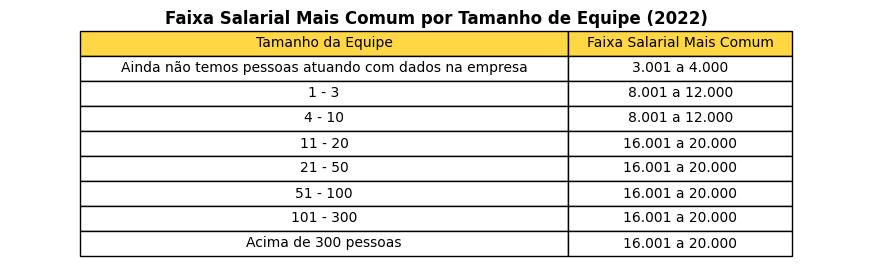

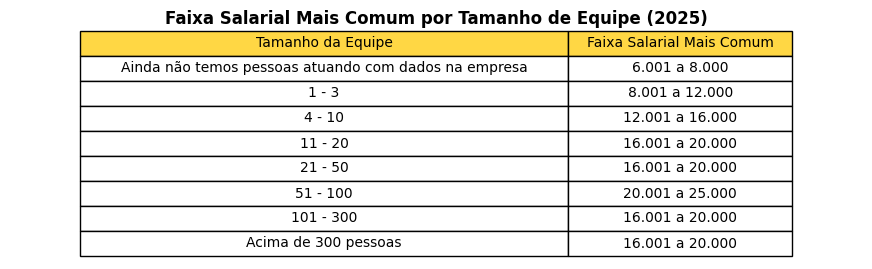

In [12]:
# ===================================================
# FAIXA SALARIAL POR TAMANHO DA EQUIPE EM 2025 vs 2022
# ===================================================


# lista de ordem da equipe
ordem_equipe = [
    'Ainda não temos pessoas atuando com dados na empresa',
    '1 - 3', '4 - 10', '11 - 20', '21 - 50', '51 - 100',
    '101 - 300', 'Acima de 300 pessoas'
]

# --- Função Principal: Gera a Tabela ---
def gerar_tabela_salario_equipe(df, ano):
    """
    Processa um DataFrame e gera uma tabela de visualização
    mostrando a faixa salarial mais comum por tamanho de equipe.

    Args:
        df (pd.DataFrame): O DataFrame a ser processado.
        ano (int): O ano de referência para o título da tabela.
    """

    df_tabela = (
        df[['tamanho_equipe', 'faixa_salario']]
        .groupby('tamanho_equipe', observed=True)
        .agg(lambda x: x.mode()[0])
        .reset_index()
    )
    df_tabela['faixa_salario'] = df_tabela['faixa_salario'].replace(mapa_salario)

    # Ordena a tabela usando a categoria de 'tamanho_equipe' para a ordem correta.
    df_tabela['tamanho_equipe'] = pd.Categorical(df_tabela['tamanho_equipe'], categories=ordem_equipe, ordered=True)
    df_tabela = df_tabela.sort_values('tamanho_equipe')

    # Cria a figura e os eixos para a tabela.
    fig, ax = plt.subplots(figsize=(11, 3))
    ax.set_axis_off()

    # Cria o título com o ano de forma dinâmica.
    titulo = f"Faixa Salarial Mais Comum por Tamanho de Equipe ({ano})"
    plt.title(
        titulo,
        fontsize=12,
        fontweight='bold',
        pad=0.2
    )

    # Cria a tabela
    table = ax.table(
        cellText=df_tabela.values,
        cellLoc='center',
        colLabels=['Tamanho da Equipe', 'Faixa Salarial Mais Comum'],
        colColours=[CORES['amarelo'], CORES['amarelo']],
        loc='center'
    )

    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(df_tabela.columns))))
    table.scale(0.5, 1.5)

    plt.show()


gerar_tabela_salario_equipe(df_2022, 2022)
gerar_tabela_salario_equipe(df_2025, 2025)

<b>Como era em 2022</b><p>
Empresas com pequenas equipes possuiam faixa salarial a partir de 4mil <p>
<b>Como esta sendo em 2025</b><p>
Houve uma valorizacao da faixa salarial mesmo para empresas com equipes pequenas<p>
<b>Diagnostico:</b><br>
A valorizacao do mercado de dados segue a tendencia global, com a crescente demanda por profissionais de dados, especialmente em equipes em formaçao (pequenas) e em empresas medias elevou os patamares salariais no Brasil.

**Calculadora da Satisfaçao**

A base de dados da calculadora da satisfaçao foi atualizada para refletir o resultado da pesquisa de 2025.

In [ ]:
from IPython.display import IFrame
url = "https://stateofdata2022.onrender.com/"
IFrame(url, width=1000, height=1200)


# Mais informações sobre como é calculada a Satisfação
# https://github.com/alanxfelipex/state-of-data-2022
# https://github.com/AnaPaulistaGit/state-of-data-2025


# Resumo e Conclusões em 2025

* A terceira principal atividade de uma pessoa que trabalha na gestão de equipes de dados ainda é a contratação e a retenção de talentos
* Existe uma tendência de queda no desafio de contratar pessoas
* Pessoas insatisfeitas buscam novas oportunidades de Trabalho
* No modelo de trabalho presencial há mais pessoas insatisfeitas do que satisfeitas
* Quanto maior flexibilidade em relação a trabalhar em casa, maior a satisfação
* O maior número de insatisfeitos estão em faixas salarias menores
* Com algumas exceções no extremo, quanto maior o salário, maior a satisfação
* Pessoas que trabalham em empresas com equipe estão mais satisfeitas que pessoas que trabalham em empresas sem equipe
* Quanto maior a equipe, maior a satisfação